# Cervical Cancer Risk Factors

# Author Information - Group 5
**Anirudhda Pardhi** - s3807109 , 
**Prerit Miglani** - s3815838 , 
**Ankita Vaid** - s3830243

### Affiliations
We certify that this is all our own original work. If we took any parts from elsewhere, then they were non-essential parts of the assignment, and they are clearly attributed in my submission.  We will show we agree to this honor code by typing "Yes": **Yes**

## Prediction of indicators/diagnosis of cervical cancer

The objective of this project is to predict the probability of cervical cancer using classification machine learning methods.
Our goal focuses on the prediction of indicators/diagnosis of cervical cancer.There are 4 target variables in the dataset which as combination will gives us level of risk in predicting cancer successfully. Here we are going to focus on one Target feature "Biopsy" which is catagorical in nature. 

The dataset was sourced from the UCI Machine Learning Repository at https://archive.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29# .

This report is organized as follows:

1.  **Overview section** describes the dataset used and the features in this dataset.
2.  **Data Preparation** section covers data cleaning and data preparation steps
3.  **Hyperparameter Tuning** describes the hyperparameter tuning process for each classification algorithm.
4.  **Performance Comparison** presents model performance comparison results.
5.  **Limitations** discusses a limitations of our approach and possible solutions.
6.  **Summary** provides a brief summary of our work in this project.

## Overview

## Methodology

We consider the following algorithms to predict the target feature:

1: K-Nearest Neighbors (KNN)
2: Decision trees (DT)
3: Naive Bayes (NB)
4: Logostic Regression (LR)
5: K-means clustering

Prior to fitting a specific classifier or clustering method on the cleaned dataset, we aim to select the best features utilizing the Random Forest Importance strategy inside a pipeline. Utilizing selected features choice along with hyperparameter search inside a solitary pipeline, we do 5-fold stratified cross-validation to fine-tune hyperparameters of each classifier using area under curve (AUC) as the performance metric. In our case the target feature have more number of 0 than 1 so this is case of unbalanced target class and we do stratification to make sure that each validation set has the same proportion of classes as in the original dataset. With the help of Grid search CV we search for best hyperparameter values in classification modelling and in case of clustering we search for best value using Elbow method. After the hyperparameter tuning process we do model fitting using 10-fold cross-validation in a combined style and we perform matched t-tests to check if there is any significant difference in the model evaluation value. We also compare the model evaluation with the help of recall,F1 score and confusion matrix to get more insight.

### Data Preparation

Importing the required modules and reading the csv file in pandas

In [1]:
# Importing required modules
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np 
import math
import seaborn as sns

In [2]:
#importing the csv file
abc = pd.read_csv('risk_factors_cervical_cancer.csv', header=0)

In [3]:
#Copying orignal dataframe to another for reference
df=abc.copy()

In [4]:
#checking first 5 records of dataframe using head function
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


### Statastical description of data

Here we are checking statastics for all the attribues of dataframe

In [5]:
df.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
## Dropping null values
df.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'],axis=1,inplace=True)
df = df.replace('?', np.NaN)
df=df.dropna()

In [7]:
##Checking for presence of null values in dataframe

df.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [8]:
df.dtypes

Age                                    int64
Number of sexual partners             object
First sexual intercourse              object
Num of pregnancies                    object
Smokes                                object
Smokes (years)                        object
Smokes (packs/year)                   object
Hormonal Contraceptives               object
Hormonal Contraceptives (years)       object
IUD                                   object
IUD (years)                           object
STDs                                  object
STDs (number)                         object
STDs:condylomatosis                   object
STDs:cervical condylomatosis          object
STDs:vaginal condylomatosis           object
STDs:vulvo-perineal condylomatosis    object
STDs:syphilis                         object
STDs:pelvic inflammatory disease      object
STDs:genital herpes                   object
STDs:molluscum contagiosum            object
STDs:AIDS                             object
STDs:HIV  

In [9]:
# Defining feature and target dataset
target = df['Biopsy']
Data = df.drop(columns=['Biopsy','Citology','Schiller','Hinselmann'])

In [10]:
Data.tail()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
857,29,2.0,20.0,1.0,0.0,0.0,0.0,1.0,0.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0


In [11]:
target.head()

0    0
1    0
3    0
4    0
5    0
Name: Biopsy, dtype: int64

## Feature Selection & Ranking

In this section we are trying to find the ranking of most important features using features 
as selected by Random Forest Importance (RFI) in the full dataset.

In [12]:
from sklearn.ensemble import RandomForestClassifier

num_features = 10
model_rfi = RandomForestClassifier(n_estimators=100)
model_rfi.fit(Data, target)
fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]

best_features_rfi = df.columns[fs_indices_rfi].values
best_features_rfi

array(['Age', 'Hormonal Contraceptives (years)',
       'First sexual intercourse', 'Number of sexual partners',
       'Num of pregnancies', 'Smokes (years)', 'IUD (years)',
       'Smokes (packs/year)', 'Hormonal Contraceptives', 'Dx:HPV'],
      dtype=object)

In [13]:
feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]
feature_importances_rfi

array([0.20084269, 0.16852886, 0.13456059, 0.10649331, 0.10043343,
       0.03789099, 0.03717423, 0.03423557, 0.0239686 , 0.02081495])

#### Feature ranking vizualisation

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

def plot_imp(best_features, scores, method_name):   
    plt.barh(best_features, scores)
    plt.title(method_name + ' Feature Importances')
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

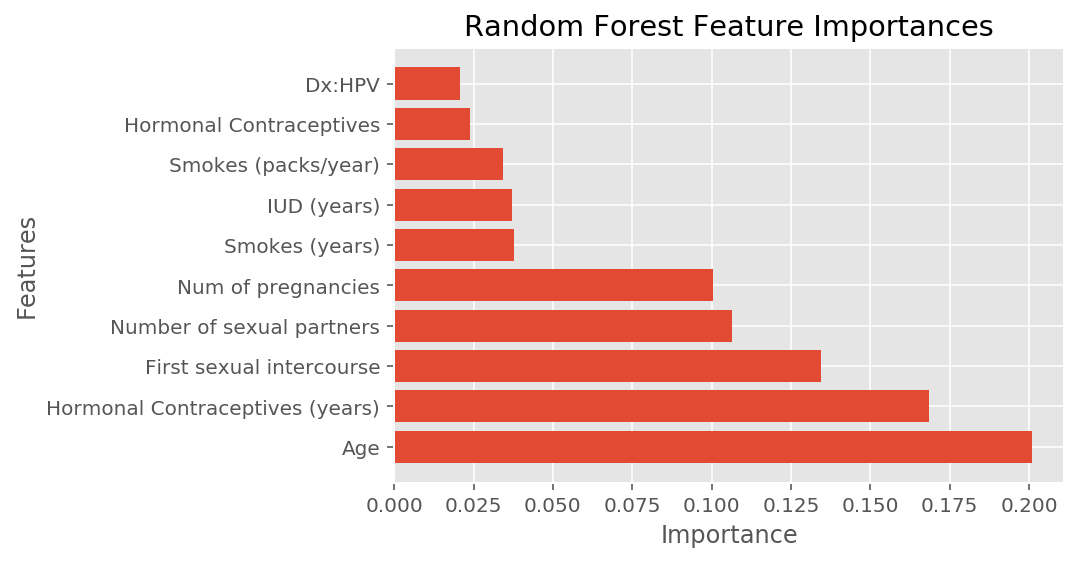

In [15]:
plot_imp(best_features_rfi, feature_importances_rfi, 'Random Forest')

In [16]:
# Selecting the important features
Data = Data[['Age', 'Hormonal Contraceptives (years)',
       'First sexual intercourse', 'Number of sexual partners',
       'Num of pregnancies', 'IUD (years)', 'Smokes (years)',
       'Smokes (packs/year)', 'Hormonal Contraceptives', 'Dx:Cancer']]

Data.tail()

,Age,Hormonal Contraceptives (years),First sexual intercourse,Number of sexual partners,Num of pregnancies,IUD (years),Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Dx:Cancer
853,34,0.0,18.0,3.0,0.0,0.0,0.0,0.0,0.0,0
854,32,8.0,19.0,2.0,1.0,0.0,0.0,0.0,1.0,0
855,25,0.08,17.0,2.0,0.0,0.0,0.0,0.0,1.0,0
856,33,0.08,24.0,2.0,2.0,0.0,0.0,0.0,1.0,0
857,29,0.5,20.0,2.0,1.0,0.0,0.0,0.0,1.0,0


### Encoding Categorical Descriptive Features

In [17]:
categorical_cols = Data.columns[Data.dtypes == np.object].tolist()
categorical_cols

['Hormonal Contraceptives (years)',
 'First sexual intercourse',
 'Number of sexual partners',
 'Num of pregnancies',
 'IUD (years)',
 'Smokes (years)',
 'Smokes (packs/year)',
 'Hormonal Contraceptives']

In [18]:
# checking catagorical values division
for categorical_col in categorical_cols:
    print(categorical_col + ':')
    print(Data[categorical_col].value_counts())
    print('\n')

Hormonal Contraceptives (years):
0.0            238
1.0             72
2.0             36
0.25            34
5.0             31
3.0             30
0.08            23
4.0             22
0.5             22
6.0             22
7.0             19
8.0             16
0.16            16
10.0            11
9.0             11
0.33             8
15.0             6
0.42             6
0.66             5
0.58             5
20.0             4
0.75             4
12.0             4
1.5              3
13.0             2
11.0             2
2.282200521      2
19.0             2
0.67             2
16.0             2
14.0             1
17.0             1
6.5              1
0.41             1
2.5              1
3.5              1
22.0             1
0.17             1
Name: Hormonal Contraceptives (years), dtype: int64


First sexual intercourse:
15.0    136
17.0    118
18.0    111
16.0     86
14.0     58
19.0     48
20.0     33
21.0     18
13.0     14
23.0      8
26.0      7
24.0      6
22.0      6
27.0     

### One-hot encoding

In [19]:
Data_encoded = Data.copy()  # retain original Data without encoding for further analysis

for col in categorical_cols:
    q = len(Data_encoded[col].unique())
    if (q == 2):
        Data_encoded[col] = pd.get_dummies(Data_encoded[col], drop_first=True)

Data_encoded = pd.get_dummies(Data_encoded)

In [20]:
print(f'Shape of Data_encoded is {Data_encoded.shape}\n')  

Data_encoded.sample(n=5, random_state=11)

Shape of Data_encoded is (668, 190)



,Age,Hormonal Contraceptives,Dx:Cancer,Hormonal Contraceptives (years)_0.0,Hormonal Contraceptives (years)_0.08,Hormonal Contraceptives (years)_0.16,Hormonal Contraceptives (years)_0.17,Hormonal Contraceptives (years)_0.25,Hormonal Contraceptives (years)_0.33,Hormonal Contraceptives (years)_0.41,...,Smokes (packs/year)_37.0,Smokes (packs/year)_4.0,Smokes (packs/year)_4.5,Smokes (packs/year)_4.8,Smokes (packs/year)_5.0,Smokes (packs/year)_6.0,Smokes (packs/year)_7.0,Smokes (packs/year)_7.5,Smokes (packs/year)_8.0,Smokes (packs/year)_9.0
472,35,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
375,22,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
474,33,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
374,21,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
172,29,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
Data_encoded.describe(include='all').round(3)

,Age,Hormonal Contraceptives,Dx:Cancer,Hormonal Contraceptives (years)_0.0,Hormonal Contraceptives (years)_0.08,Hormonal Contraceptives (years)_0.16,Hormonal Contraceptives (years)_0.17,Hormonal Contraceptives (years)_0.25,Hormonal Contraceptives (years)_0.33,Hormonal Contraceptives (years)_0.41,...,Smokes (packs/year)_37.0,Smokes (packs/year)_4.0,Smokes (packs/year)_4.5,Smokes (packs/year)_4.8,Smokes (packs/year)_5.0,Smokes (packs/year)_6.0,Smokes (packs/year)_7.0,Smokes (packs/year)_7.5,Smokes (packs/year)_8.0,Smokes (packs/year)_9.0
count,668.000,668.000,668.000,668.000,668.000,668.000,668.000,668.000,668.000,668.000,...,668.000,668.000,668.000,668.000,668.000,668.000,668.000,668.000,668.000,668.000
mean,27.265,0.644,0.025,0.356,0.034,0.024,0.001,0.051,0.012,0.001,...,0.001,0.001,0.001,0.001,0.003,0.004,0.003,0.001,0.003,0.003
std,8.727,0.479,0.158,0.479,0.182,0.153,0.039,0.220,0.109,0.039,...,0.039,0.039,0.039,0.039,0.055,0.067,0.055,0.039,0.055,0.055
min,13.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,21.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,26.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,33.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
max,84.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


### Scaling of Features

In [22]:
from sklearn import preprocessing
Data_scaler = preprocessing.MinMaxScaler()
Data_encoded_norm_numpy = Data_scaler.fit_transform(Data_encoded)
Data_encoded_norm_df = pd.DataFrame(Data_encoded_norm_numpy, 
                                    columns=Data_encoded.columns)

Data_encoded_norm_df.sample(n=4, random_state=11)

,Age,Hormonal Contraceptives,Dx:Cancer,Hormonal Contraceptives (years)_0.0,Hormonal Contraceptives (years)_0.08,Hormonal Contraceptives (years)_0.16,Hormonal Contraceptives (years)_0.17,Hormonal Contraceptives (years)_0.25,Hormonal Contraceptives (years)_0.33,Hormonal Contraceptives (years)_0.41,...,Smokes (packs/year)_37.0,Smokes (packs/year)_4.0,Smokes (packs/year)_4.5,Smokes (packs/year)_4.8,Smokes (packs/year)_5.0,Smokes (packs/year)_6.0,Smokes (packs/year)_7.0,Smokes (packs/year)_7.5,Smokes (packs/year)_8.0,Smokes (packs/year)_9.0
376,0.309859,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
297,0.126761,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
378,0.281690,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
296,0.112676,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
print(f'Shape of Data_encoded_norm_df is {Data_encoded_norm_df.shape}\n') 

Data_encoded_norm_df.describe(include='all').round(3)

Shape of Data_encoded_norm_df is (668, 190)



,Age,Hormonal Contraceptives,Dx:Cancer,Hormonal Contraceptives (years)_0.0,Hormonal Contraceptives (years)_0.08,Hormonal Contraceptives (years)_0.16,Hormonal Contraceptives (years)_0.17,Hormonal Contraceptives (years)_0.25,Hormonal Contraceptives (years)_0.33,Hormonal Contraceptives (years)_0.41,...,Smokes (packs/year)_37.0,Smokes (packs/year)_4.0,Smokes (packs/year)_4.5,Smokes (packs/year)_4.8,Smokes (packs/year)_5.0,Smokes (packs/year)_6.0,Smokes (packs/year)_7.0,Smokes (packs/year)_7.5,Smokes (packs/year)_8.0,Smokes (packs/year)_9.0
count,668.000,668.000,668.000,668.000,668.000,668.000,668.000,668.000,668.000,668.000,...,668.000,668.000,668.000,668.000,668.000,668.000,668.000,668.000,668.000,668.000
mean,0.201,0.644,0.025,0.356,0.034,0.024,0.001,0.051,0.012,0.001,...,0.001,0.001,0.001,0.001,0.003,0.004,0.003,0.001,0.003,0.003
std,0.123,0.479,0.158,0.479,0.182,0.153,0.039,0.220,0.109,0.039,...,0.039,0.039,0.039,0.039,0.055,0.067,0.055,0.039,0.055,0.055
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.113,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,0.183,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.282,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [24]:
df_clean = Data_encoded_norm_df.assign(target = target.values)
df_clean.sample(n=4, random_state=11)

,Age,Hormonal Contraceptives,Dx:Cancer,Hormonal Contraceptives (years)_0.0,Hormonal Contraceptives (years)_0.08,Hormonal Contraceptives (years)_0.16,Hormonal Contraceptives (years)_0.17,Hormonal Contraceptives (years)_0.25,Hormonal Contraceptives (years)_0.33,Hormonal Contraceptives (years)_0.41,...,Smokes (packs/year)_4.0,Smokes (packs/year)_4.5,Smokes (packs/year)_4.8,Smokes (packs/year)_5.0,Smokes (packs/year)_6.0,Smokes (packs/year)_7.0,Smokes (packs/year)_7.5,Smokes (packs/year)_8.0,Smokes (packs/year)_9.0,target
376,0.309859,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
297,0.126761,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
378,0.281690,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
296,0.112676,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [25]:
df_clean.to_csv('sample5.csv', index=False)
xyz = pd.read_csv('sample5.csv', header=0)
xyz.tail(5)

,Age,Hormonal Contraceptives,Dx:Cancer,Hormonal Contraceptives (years)_0.0,Hormonal Contraceptives (years)_0.08,Hormonal Contraceptives (years)_0.16,Hormonal Contraceptives (years)_0.17,Hormonal Contraceptives (years)_0.25,Hormonal Contraceptives (years)_0.33,Hormonal Contraceptives (years)_0.41,...,Smokes (packs/year)_4.0,Smokes (packs/year)_4.5,Smokes (packs/year)_4.8,Smokes (packs/year)_5.0,Smokes (packs/year)_6.0,Smokes (packs/year)_7.0,Smokes (packs/year)_7.5,Smokes (packs/year)_8.0,Smokes (packs/year)_9.0,target
663,0.295775,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
664,0.267606,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
665,0.169014,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
666,0.281690,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
667,0.225352,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [26]:
# Splitiing Data features and target 

target = xyz['target']
Data = xyz.drop(columns=['target'])

In [27]:
Data.tail()

,Age,Hormonal Contraceptives,Dx:Cancer,Hormonal Contraceptives (years)_0.0,Hormonal Contraceptives (years)_0.08,Hormonal Contraceptives (years)_0.16,Hormonal Contraceptives (years)_0.17,Hormonal Contraceptives (years)_0.25,Hormonal Contraceptives (years)_0.33,Hormonal Contraceptives (years)_0.41,...,Smokes (packs/year)_37.0,Smokes (packs/year)_4.0,Smokes (packs/year)_4.5,Smokes (packs/year)_4.8,Smokes (packs/year)_5.0,Smokes (packs/year)_6.0,Smokes (packs/year)_7.0,Smokes (packs/year)_7.5,Smokes (packs/year)_8.0,Smokes (packs/year)_9.0
663,0.295775,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
664,0.267606,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
665,0.169014,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
666,0.281690,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
667,0.225352,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

### Data Sampling & Train-Test Splitting

In [29]:
n_samples = 500

Data_sample = pd.DataFrame(Data).sample(n=n_samples, random_state=8).values
target_sample = pd.DataFrame(target).sample(n=n_samples, random_state=8).values

print(Data_sample.shape)
print(target_sample.shape)

(500, 190)
(500, 1)


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Data_sample,target_sample,test_size=0.4,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(300, 190)
(200, 190)
(300, 1)
(200, 1)


## Model Evaluation Strategy

## Hyperparameter Tuning

### K-Nearest Neighbors (KNN) tuning

In [31]:
from sklearn.model_selection import RepeatedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

#Import knearest neighbors Classifier model

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor   

cv_method = RepeatedKFold(n_splits=5, 
                          n_repeats=3, 
                          random_state=999)

knn_Classifier = KNeighborsClassifier()

params_knn_Classifier = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10], 
                        'p': [2]}

gs_knn_Classifier = GridSearchCV(estimator=knn_Classifier, 
                  param_grid=params_knn_Classifier, 
                  verbose=1, 
                  cv=cv_method)

gs_knn_Classifier.fit(X_train, y_train);

Fitting 15 folds for each of 10 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    3.6s finished


In [32]:
gs_knn_Classifier.best_params_

{'n_neighbors': 4, 'p': 2}

As per result we can see that best parameter for K-Nearest Neighbors is K=4 so we will Error Rate vs Kvalue to find out thr error percentage associated with k value.

Text(0, 0.5, 'Error Rate')

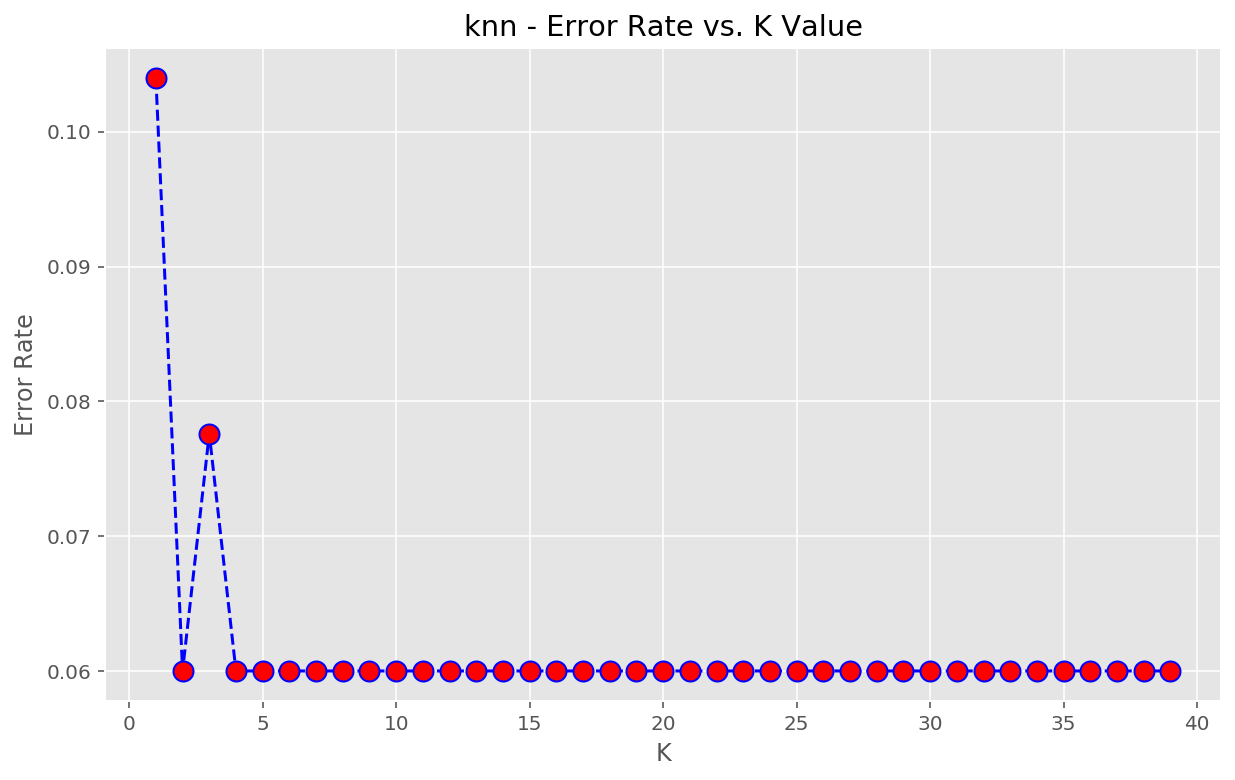

In [33]:
# calculate appropriate K for Knn

error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed',
marker='o',markerfacecolor='red', markersize=10)
plt.title('knn - Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [34]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=4)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.94


### Decision Trees (DT) tuning

We want to make a decision tree with the help of Gini index which will maximize the information gain. Our aim is to find the optimal combinations of maximum depth (max_depth) and minimum sample split (min_samples_split). 

In [35]:
# custom function for RFI feature selection inside a pipeline
# here we use n_estimators=100

from sklearn.base import BaseEstimator, TransformerMixin
class RFIFeatureSelector(BaseEstimator, TransformerMixin):
    
    # class constructor 
    # make sure class attributes end with a "_"
    # per scikit-learn convention to avoid errors
    def __init__(self, n_features_=10):
        self.n_features_ = n_features_
        self.fs_indices_ = None

    # override the fit function
    def fit(self, X, y):
        from sklearn.ensemble import RandomForestClassifier
        from numpy import argsort
        model_rfi = RandomForestClassifier(n_estimators=100)
        model_rfi.fit(X, y)
        self.fs_indices_ = argsort(model_rfi.feature_importances_)[::-1][0:self.n_features_] 
        return self 
    
    # override the transform function
    def transform(self, X, y=None):
        return X[:, self.fs_indices_]


In [36]:
# Decisison tree

from sklearn.pipeline import Pipeline

from sklearn.metrics import roc_auc_score

from sklearn.tree import DecisionTreeClassifier

pipe_DT = Pipeline([('rfi_fs', RFIFeatureSelector()),
                    ('dt', DecisionTreeClassifier(criterion='gini', random_state=111))])

params_pipe_DT = {'rfi_fs__n_features_': [10, 20, Data.shape[1]],
                  'dt__max_depth': [3, 4, 5],
                  'dt__min_samples_split': [2, 5]}

gs_pipe_DT = GridSearchCV(estimator=pipe_DT, 
                          param_grid=params_pipe_DT, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          verbose=1) 

gs_pipe_DT.fit(X_train, y_train);

Fitting 15 folds for each of 18 candidates, totalling 270 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:   33.5s
[Parallel(n_jobs=-2)]: Done 270 out of 270 | elapsed:   43.9s finished


In [37]:
gs_pipe_DT.best_params_

{'dt__max_depth': 5, 'dt__min_samples_split': 5, 'rfi_fs__n_features_': 10}

Accoding to the results he best DT has a maximum depth of 3 and minimum split value of 5.

In [38]:
gs_pipe_DT.best_score_

0.5693544806106562

In [39]:
# custom function to format the search results as a Pandas data frame
def get_search_results(gs):

    def model_result(scores, params):
        scores = {'mean_score': np.mean(scores),
             'std_score': np.std(scores),
             'min_score': np.min(scores),
             'max_score': np.max(scores)}
        return pd.Series({**params,**scores})

    models = []
    scores = []

    for i in range(gs.n_splits_):
        key = f"split{i}_test_score"
        r = gs.cv_results_[key]        
        scores.append(r.reshape(-1,1))

    all_scores = np.hstack(scores)
    for p, s in zip(gs.cv_results_['params'], all_scores):
        models.append((model_result(s, p)))

    pipe_results = pd.concat(models, axis=1).T.sort_values(['mean_score'], ascending=False)

    columns_first = ['mean_score', 'std_score', 'max_score', 'min_score']
    columns = columns_first + [c for c in pipe_results.columns if c not in columns_first]

    return pipe_results[columns]

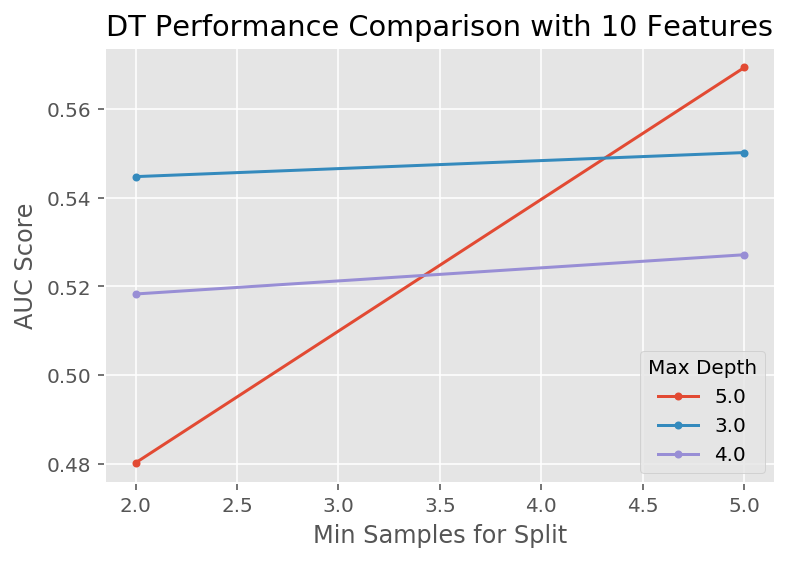

In [40]:
results_DT = get_search_results(gs_pipe_DT)
results_DT_10_features = results_DT[results_DT['rfi_fs__n_features_'] == 10.0]


for i in results_DT_10_features['dt__max_depth'].unique():
    temp = results_DT_10_features[results_DT_10_features['dt__max_depth'] == i]
    plt.plot(temp['dt__min_samples_split'], temp['mean_score'], marker = '.', label = i)
    
plt.legend(title = "Max Depth")
plt.xlabel('Min Samples for Split')
plt.ylabel("AUC Score")
plt.title("DT Performance Comparison with 10 Features")
plt.show()

In [41]:
# Decisison Tree implementation
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(Data_sample,target_sample,test_size=0.4,random_state=0)
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = 'gini',max_depth=4, min_samples_split=5,max_features=None,max_leaf_nodes=None)
fit= clf.fit (X_train1,y_train1)
y_pred1 = fit.predict (X_test1)

In [42]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy

print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy: 0.91


### (Gaussian) Naive Bayes (NB) tuning

We implement a Gaussian Naive Bayes model. We optimize var_smoothing (a variant of Laplace smoothing) as we do not have any prior information about our dataset. By default, the var_smoothing parameter's value is  10−9  . We conduct the grid search in the logspace (over the powers of 10) sourced from NumPy. We start with 10 and end with  10−3  with 200 different values, but we perform a random search over only 20 different values (for shorter run times). Since NB requires each descriptive feature to follow a Gaussian distribution, we first perform a power transformation on the input data before model fitting.

In [43]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(Data_sample,target_sample,test_size=0.4,random_state=0)

from sklearn.preprocessing import PowerTransformer
Data_sample_train_transformed = PowerTransformer().fit_transform(X_train)

In [44]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV

pipe_NB = Pipeline([('rfi_fs', RFIFeatureSelector()), 
                     ('nb', GaussianNB())])

params_pipe_NB = {'rfi_fs__n_features_': [10, 20, Data.shape[1]],
                  'nb__var_smoothing': np.logspace(1,-3, num=200)}

n_iter_search = 20
gs_pipe_NB = RandomizedSearchCV(estimator=pipe_NB, 
                          param_distributions=params_pipe_NB, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='roc_auc',
                          n_iter=n_iter_search,
                          verbose=1) 

gs_pipe_NB.fit(Data_sample_train_transformed, y_train2);

Fitting 15 folds for each of 20 candidates, totalling 300 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:   45.0s finished


In [45]:
gs_pipe_NB.best_params_

{'rfi_fs__n_features_': 10, 'nb__var_smoothing': 0.10234114021054533}

In [46]:
gs_pipe_NB.best_score_

0.5328638236133699

In [47]:
results_NB = get_search_results(gs_pipe_NB)
results_NB.head()

,mean_score,std_score,max_score,min_score,rfi_fs__n_features_,nb__var_smoothing
3,0.532864,0.084966,0.681287,0.375000,10.0,0.102341
7,0.532458,0.155574,0.818713,0.233918,10.0,0.821434
6,0.522723,0.122487,0.798246,0.318713,10.0,0.009222
16,0.515145,0.102331,0.678363,0.269006,20.0,6.593188
18,0.513318,0.091436,0.722222,0.387931,20.0,0.048803


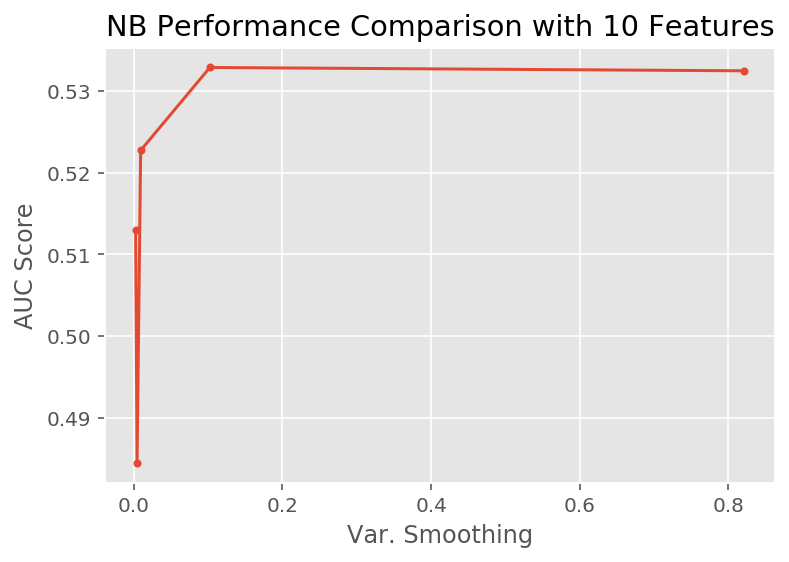

In [48]:
results_NB_10_features = results_NB[results_NB['rfi_fs__n_features_'] == 10.0].sort_values('nb__var_smoothing')

plt.plot(results_NB_10_features['nb__var_smoothing'], results_NB_10_features['mean_score'], marker = '.', label = i)    
plt.xlabel('Var. Smoothing')
plt.ylabel("AUC Score")
plt.title("NB Performance Comparison with 10 Features")
plt.show()

In [49]:
# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB

X_train_transformed = PowerTransformer().fit_transform(X_train2)

y_train_transformed = PowerTransformer().fit_transform(y_train2)

classifier = GaussianNB()
classifier.fit(X_train2, y_train2)

# Predicting the Test set results
y_pred2 = classifier.predict(X_test2)

In [50]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.53


### Kmeans clustering tuning

Here we choose k value with the help of elbow method.

Below are the steps to find optimum K :

1- K- means clustering is performed for different values of k (from 1 to 10).

2- WCSS is calculated for each cluster.

3- A curve is plotted between WCSS values and the number of clusters k.

4- The sharp point of bend or a point of the plot looks like an arm, then that point is considered as the best value of K.

Text(0.5, 1.0, 'Elbow Method')

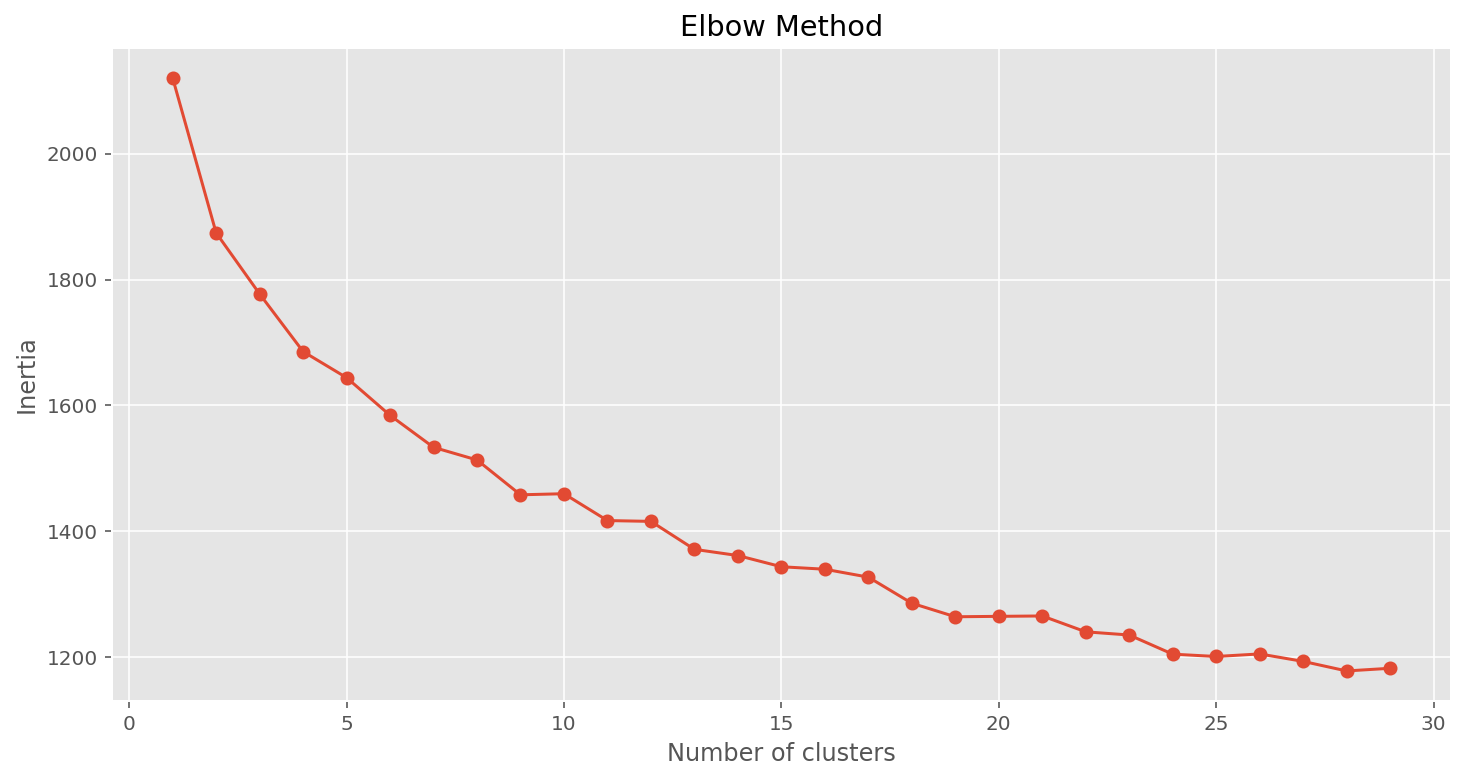

In [51]:
from sklearn.cluster import KMeans

data_scaled = Data_sample

# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,30):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,30), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

In [52]:
training_data = Data

In [53]:
# Training the kmeans model on the Training set
from sklearn import cluster
model = cluster.KMeans(n_clusters = 2, random_state=14, init='k-means++' )
model.fit(training_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=14, tol=0.0001, verbose=0)

In [54]:
training_data["cluster"] = fit.predict(training_data)
training_data["targett"] = target
cls = training_data["cluster"]
tgt = training_data["targett"]
training_data["c"] = "count"
clustering_result = training_data[["cluster", "targett", "c"]].groupby(["cluster", "targett"]).agg("count")
print(clustering_result)

                   c
cluster targett     
0       0        611
        1         40
1       0         12
        1          5


In [55]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(tgt, cls))

Accuracy: 0.9221556886227545


###  Logistic regression tuning

In [56]:
param_grid_lr = {
    'max_iter': [20, 50, 100, 200, 500, 1000],                      
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   
    'class_weight': ['balanced']                                    
}

from sklearn.model_selection import train_test_split
X_train5, X_test5, y_train5, y_test5 = train_test_split(Data_sample,target_sample,test_size=0.4,random_state=0)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
logModel_grid = GridSearchCV(estimator=LogisticRegression(random_state=1234), param_grid=param_grid_lr, verbose=1, cv=10, n_jobs=-1)
logModel_grid.fit(X_train5, y_train5)
print(logModel_grid.best_estimator_)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   20.0s finished


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=200, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1234, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)


In [57]:
y_pred5 = logModel_grid.predict(X_test5)

# Model Accuracy

print("Accuracy:",metrics.accuracy_score(y_test5, y_pred5))

Accuracy: 0.94


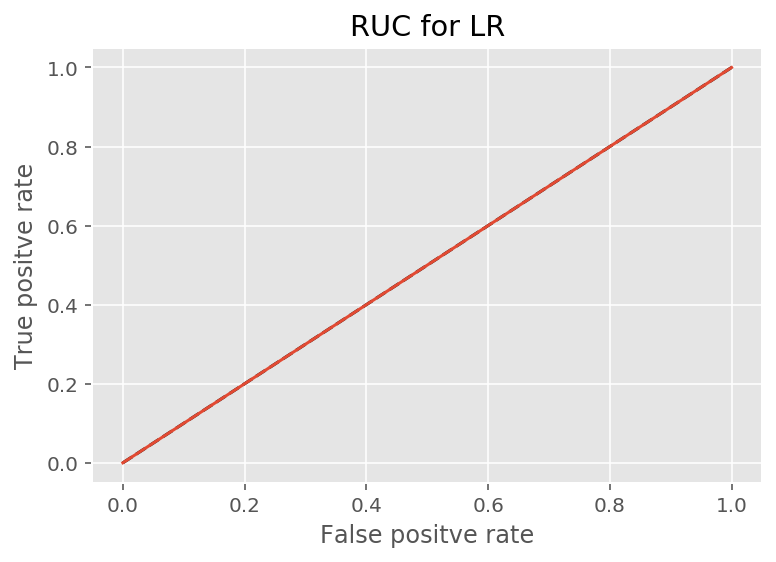

In [58]:
from sklearn.metrics import roc_curve

fpr,tpr,thresholds = roc_curve(y_test5,y_pred5)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False positve rate')
plt.ylabel('True positve rate')
plt.title('RUC for LR')
plt.show()

A model with no discrimination ability will have an ROC curve which is the 45 degree diagonal line.

## Performance Comparison

During the hyperparameter tuning phase above, we used the 560 rows in our training data within a cross-validation framework and we determined the best hyperparameter values for each of the four classifiers and clustering method. Now we can train our model to data. This can be done with the fit() method of the model. This fit() command causes a number of model-dependent internal computations to take place and the results of these computations are stored in our selected model specific attributes. Once model is trained we predict labels for unknown data of target column using Predict() method. Since cross validation itself is a random process, we would like to perform pairwise t-tests to determine if any difference between the performance of any two (tuned) classifiers is statistically significant. Specifically, we first perform 10-fold stratified cross-validation (without any repetitions) on each (tuned) classifier where we use the same seed in each of the three cross-validation runs. Second, we conduct a paired t-test for the AUC score between the following (tuned) classifier combinations:

1- KNN vs NB

2- KNN vs DT

3- DT vs NB

4- KNN vs LR

5- LR vs DT

6- LR vs NB

## Discussion

On the same dataset we have applied different machine learning algorithms so it becomes quite significant for us to do a performance comparison so that we can check which model is performing well and is able to distinguish and predict the target variable efficiently. Since our dataset is bit imbalanced in terms of number of 0 and 1 in target variable so we have opted for StratifiedKFold method. Here we have opted for K-fold cross validation technique which is a sequence of fits where each subset of the data is used both as a training set and as a validation set. Repeating the validation across different subsets of the data can gives us better idea about the performance of the algorithm.

In [59]:
## Naive Bayes 

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

cv_method_ttest = StratifiedKFold(n_splits=10, random_state=111)

Data_sample_test_transformed = PowerTransformer().fit_transform(Data_sample)

cv_results_NB = cross_val_score(estimator=gs_pipe_NB.best_estimator_,
                                X=Data_sample_test_transformed,
                                y=target_sample, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_NB.mean()

0.6159574468085107

In [61]:
## Knn evaluation

cv_results_KNN = cross_val_score(estimator=gs_knn_Classifier.best_estimator_,
                                 X=Data_sample,
                                 y=target_sample, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='roc_auc')
cv_results_KNN.mean()

0.5014184397163121

In [62]:
## Decision tree evaluation part

cv_results_DT = cross_val_score(estimator=gs_pipe_DT.best_estimator_,
                                X=Data_sample,
                                y=target_sample, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_DT.mean()

0.6797872340425531

In [63]:
## Logistic evaluation

cv_results_LR = cross_val_score(estimator=logModel_grid.best_estimator_,
                                X=Data_sample,
                                y=target_sample, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')
cv_results_LR.mean()

0.46524822695035456

Since we fixed the random state to be same during cross-validation, all (tuned) classifiers were fitted and then tested on exactly the same data partitions, making our results "paired" in a statistical sense. So, we use the stats.ttest_rel function from the SciPy module to run the following (paired) t-tests.

In [64]:
from scipy import stats

print(stats.ttest_rel(cv_results_KNN, cv_results_NB))
print(stats.ttest_rel(cv_results_KNN, cv_results_DT))
print(stats.ttest_rel(cv_results_DT, cv_results_NB))
print(stats.ttest_rel(cv_results_KNN, cv_results_LR))
print(stats.ttest_rel(cv_results_LR, cv_results_DT))
print(stats.ttest_rel(cv_results_LR, cv_results_NB))


Ttest_relResult(statistic=-2.8586558401184967, pvalue=0.01882160118103209)
Ttest_relResult(statistic=-3.4110863802848006, pvalue=0.00773629911525984)
Ttest_relResult(statistic=1.7768542185040113, pvalue=0.1093178005499966)
Ttest_relResult(statistic=0.6785673060060201, pvalue=0.5144797466698487)
Ttest_relResult(statistic=-2.472914995609956, pvalue=0.035400563089105934)
Ttest_relResult(statistic=-2.0542483785571615, pvalue=0.07013000096233407)


A p-value smaller than 0.05 indicates a statistically significant difference. Looking at these results, we can't which is statistically the best model in this competition (in terms of AUC) when compared on the test data.
Though we used AUC to optimize the algorithm hyperparameters, we shall consider the following metrics to evaluate models based on the test set:

1-Accuracy

2-Precision

3-Recall

4-F1 Score (the harmonic average of precision and recall)

5-Confusion Matrix

These metrics can be computed using classification_report from sklearn.metrics. The classification reports are shown below.

### Classification report comparision

In [65]:
# KNN classification report
from sklearn.metrics import classification_report,precision_score,recall_score,f1_score,roc_auc_score,accuracy_score
print("KNN classification report: \n",classification_report(y_test,y_pred))

KNN classification report: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       188
           1       0.00      0.00      0.00        12

    accuracy                           0.94       200
   macro avg       0.47      0.50      0.48       200
weighted avg       0.88      0.94      0.91       200



In [66]:
## Decisoion tree classification report
from sklearn.metrics import classification_report,precision_score,recall_score,f1_score,roc_auc_score,accuracy_score
print("Decisoion tree classification report: \n",classification_report(y_test1,y_pred1))

Decisoion tree classification report: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.95       188
           1       0.00      0.00      0.00        12

    accuracy                           0.91       200
   macro avg       0.47      0.48      0.48       200
weighted avg       0.88      0.91      0.90       200



In [67]:
## Naive Bayes classification report

from sklearn.metrics import classification_report,precision_score,recall_score,f1_score,roc_auc_score,accuracy_score
print("Naive Bayes classification report: \n",classification_report(y_test2,y_pred2))

Naive Bayes classification report: 
               precision    recall  f1-score   support

           0       0.94      0.54      0.68       188
           1       0.05      0.42      0.10        12

    accuracy                           0.53       200
   macro avg       0.49      0.48      0.39       200
weighted avg       0.88      0.53      0.65       200



In [68]:
## K-cluster classification report

from sklearn.metrics import classification_report,precision_score,recall_score,f1_score,roc_auc_score,accuracy_score
print("K-cluster classification report: \n",classification_report(tgt, cls))

K-cluster classification report: 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       623
           1       0.29      0.11      0.16        45

    accuracy                           0.92       668
   macro avg       0.62      0.55      0.56       668
weighted avg       0.90      0.92      0.91       668



In [69]:
## Logistic regression classification report

from sklearn.metrics import classification_report,precision_score,recall_score,f1_score,roc_auc_score,accuracy_score
print("Logistic regression classification report: \n",classification_report(y_test5,y_pred5))

Logistic regression classification report: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       188
           1       0.00      0.00      0.00        12

    accuracy                           0.94       200
   macro avg       0.47      0.50      0.48       200
weighted avg       0.88      0.94      0.91       200



### Confusion Matrix comparision

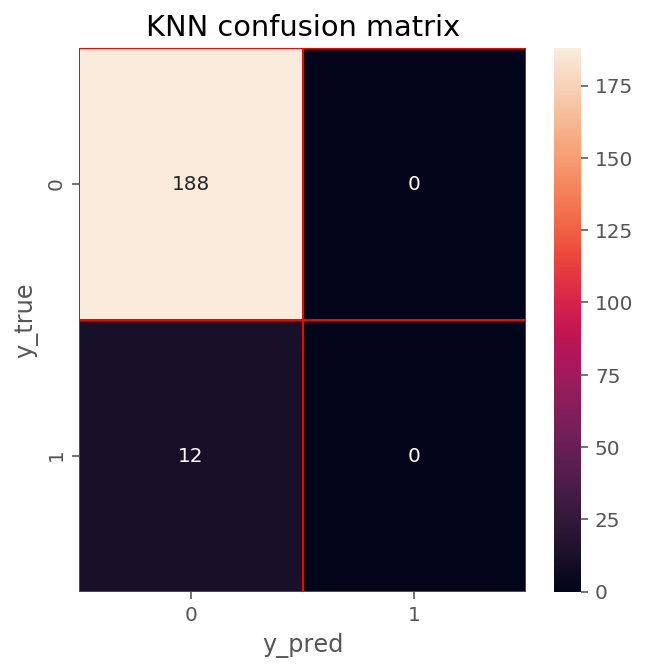

In [70]:
# KNN confusion matrix
from sklearn.metrics import confusion_matrix
cmknn = confusion_matrix(y_test,y_pred)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cmknn,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("KNN confusion matrix")
plt.show()

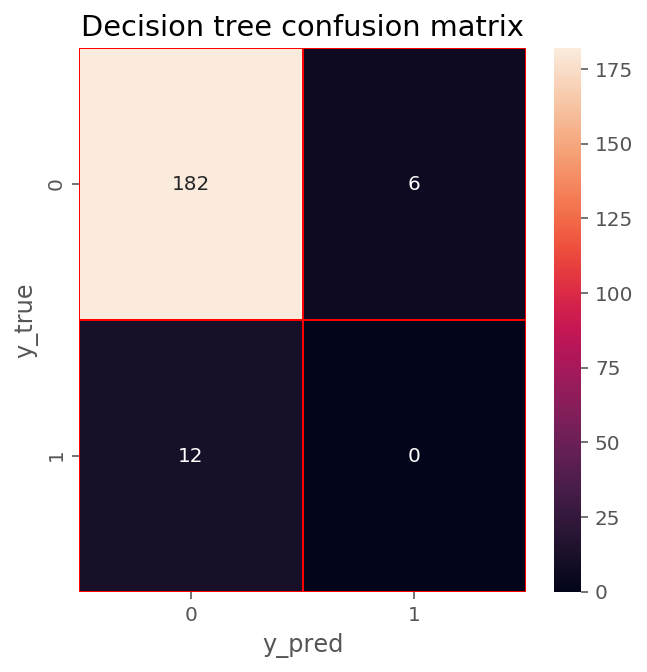

In [71]:
## Decision tree confusion matrix

from sklearn.metrics import confusion_matrix
cmdt = confusion_matrix(y_test1,y_pred1)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cmdt,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Decision tree confusion matrix")
plt.show()

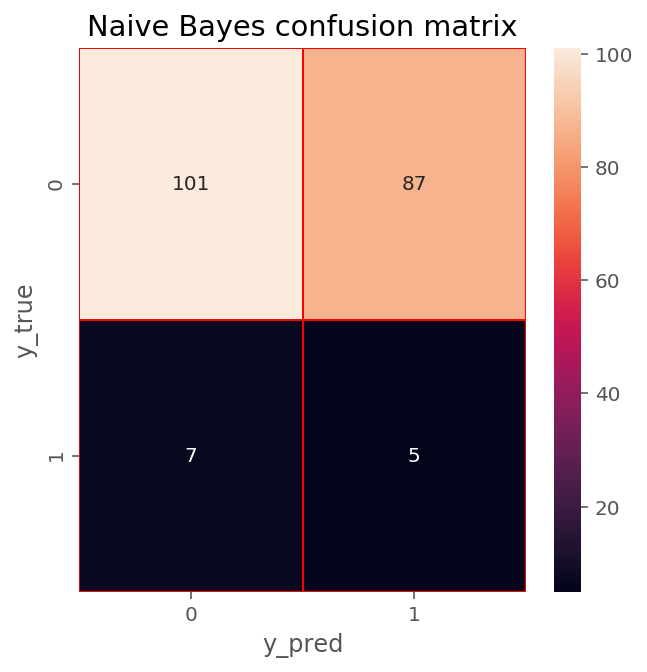

In [72]:
## Naive Bayes confusion matrix

from sklearn.metrics import confusion_matrix
cmdt = confusion_matrix(y_test2,y_pred2)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cmdt,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Naive Bayes confusion matrix")
plt.show()

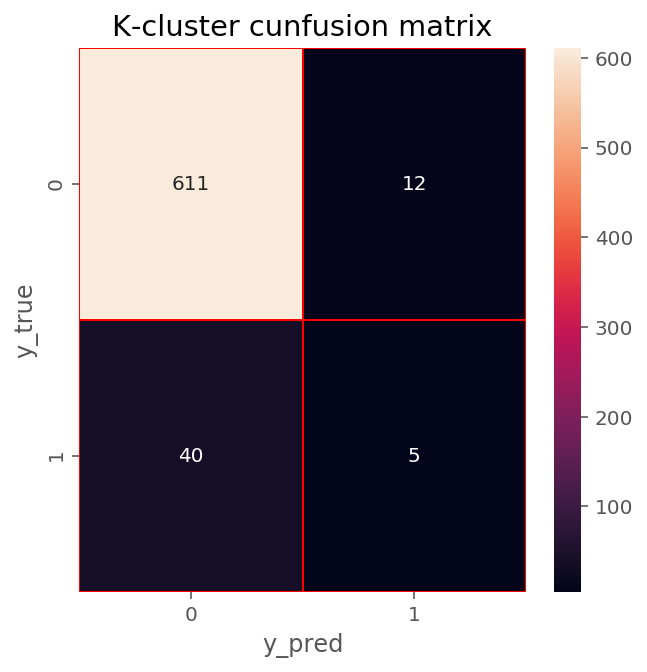

In [73]:
## K-means clustering cunfusion matrix

from sklearn.metrics import confusion_matrix
cmknn = confusion_matrix(tgt,cls)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cmknn,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("K-cluster cunfusion matrix")
plt.show()

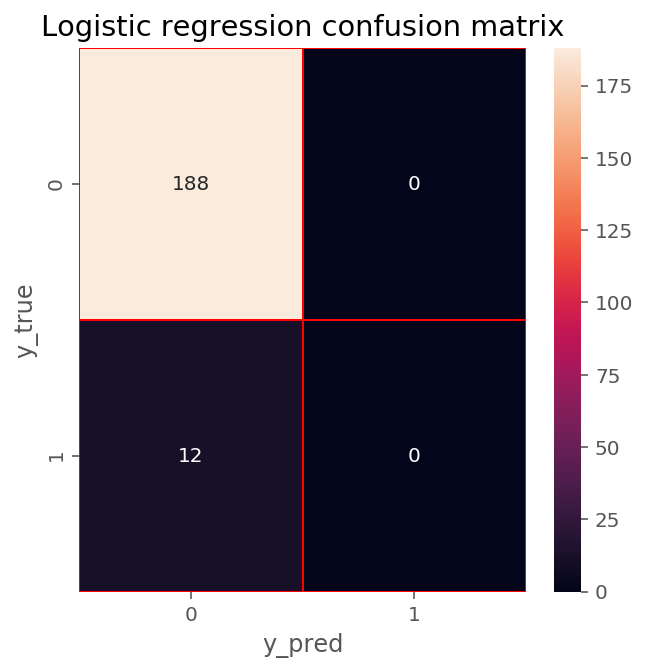

In [74]:
## Logistic regression confusion matrix

from sklearn.metrics import confusion_matrix
cmdt = confusion_matrix(y_test5,y_pred5)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cmdt,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Logistic regression confusion matrix")
plt.show()

## Limitations and Proposed Solutions 

Our modeling techniques have few flaws and limitations. We have done feature selection before the hot one encoding and scaling process. We have opted to pick top 10 features on hit and trial basis and we are not sure how many variables would have been appropriate for better modelling performance. In KNN classification method we choose k=4 using Gridcv method but as per error rate K value beyond 5 was flat line with very low error which leaves a room of doubt. In Naive bayes algorithm we utilized a blanket power transformation on the training data when building the Naïve bayes, ignoring the dummy features within the dataset. This might partially explain the poor performance of the NB when evaluated on the test set. A potential solution is to build a Gaussian NB and a Bernoulli NB separately on the numerical and dummy descriptive features respectively. Then we can compute a final prediction by multiplying predictions from each model since NB assumes inter-independence conditioned on the value of the target feature. In K-means clustering method the elbow curve is not very differentiating as that point is considered as the best value of K which is obtained at sharp point of bend but in our case there was not specific sharp differentiating point.In case of Logistic regression algorithm we can see that a linear line is there in ROC curve and we know that a model with no discrimination ability will have an ROC curve which is the 45 degree diagonal line. As per my observation Decision tree is the algorithm which have less flaws than other and it statistically outperforms the other four models. Since this is classification problem of target variables we could achieve better results by using Random forest algorithm as it’s method are based on decision tree with better performance acapability. 

## Summary 

On our dataset considering the flaws and limitation, Decision Tree model seems to be performing better than other 4 models based on classification report and confusion matrix. In Decision tree as per the optimum parameters obtained by Gridsearch cv method we were able to justify them with respect to AUC. However in other models optimum parameters obtained were not able to justify properly as discussed earlier. 


## References

UCI Machine Learning Repository: Census Income Data Set [online]. Available at https://archive.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29#